## Hackathon (Problem statement)

## Done By: Hardik Raja (https://github.com/hardiksraja)

#### Binary Customer Churn

#### A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.


In [190]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.simplefilter('ignore')
from sklearn import metrics

In [155]:
#Read the CSV File
df_train = pd.read_csv("D:\\Aegis\\PPT_StudyMaterial_new\\Hackathon\\customer_churn.csv")
df_test = pd.read_csv("D:\\Aegis\\PPT_StudyMaterial_new\\Hackathon\\new_customers.csv")

# 1. Performing EDA - Exploratory Data Analysis

In [26]:
df_train.shape, df_test.shape

((900, 10), (6, 9))

In [27]:
df_train.columns, df_test.columns

(Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
        'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
       dtype='object'),
 Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
        'Num_Sites', 'Onboard_date', 'Location', 'Company'],
       dtype='object'))

In [28]:
df_train.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,30-08-2013 07:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,13-08-2013 00:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,29-06-2016 06:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,22-04-2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,19-01-2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [29]:
df_test.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37,9935.53,1,7.71,8,29-08-2011 18:37,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23,7526.94,1,9.28,15,22-07-2013 18:19,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65,100.00,1,1.00,15,11-12-2006 07:48,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32,6487.50,0,9.40,14,28-10-2016 05:32,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32,13147.71,1,10.00,8,20-03-2012 00:36,Unit 0789 Box 0734 DPO AP 39702,Wood LLC


In [30]:
df_train.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [31]:
df_test.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
dtype: int64

In [32]:
print(df_train.dtypes)
print("\n")
print(df_test.dtypes)

Names               object
Age                  int64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites            int64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object


Names               object
Age                  int64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites            int64
Onboard_date        object
Location            object
Company             object
dtype: object


# 2. Data Cleaning

# >>Observations

# >>Independent Variables
#### Names - Its just the name of contact person at company and two persons have same name at two different companies

#### Age - Could be coorelated with Churning probablity
#### Total_Purchase - Could be coorelated with Churning probablity
#### Account_Manager = 467 clients dont have account manager assigned, whereas 433 have an assigned account manager.
#### Years - Could be coorelated with Churning probablity
#### Num_Sites - Could be coorelated with Churning probablity

# >>Feature Extraction
#### Onboard_Year - All were boarded on different dates, hence we can order them in ascending order of getting onboarded.
#### Location - we can extract the state they belong, to get more idea on which state have the probablity to churn
#### Company - Some companies use the service for their multiple office locations, Eg. Company Anderson Group has offices at multiple locations

# >>Dependent Variable/Predicted Variable
#### Churn indicates 750 are not churned and 150 are churned


# >>Quantitative Variables
#### Age,
#### Total_Purchase,
#### Years,
#### Num_Sites,
#### Onboard_Year : Create from Onboard_date

# >>Qualitative Variables
#### Account_Manager - Its already encoded
#### Company - We need to encode it
#### Location - We need to extract State code and encode it

In [108]:
df_train['State'] = df_train['Location'].str.split(', |DPO |FPO', 1).str[1].str.strip().str[:2]
df_test['State'] = df_test['Location'].str.split(', |DPO |FPO |Carlos', 1).str[1].str.strip().str[:2]

In [109]:
df_train['Onboard_Year'] = pd.DatetimeIndex(df_train['Onboard_date']).year
df_test['Onboard_Year'] = pd.DatetimeIndex(df_test['Onboard_date']).year

In [110]:
df_train_1=df_train[['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Company','State','Onboard_Year','Churn']]
df_test_1=df_test[['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Company','State','Onboard_Year']]

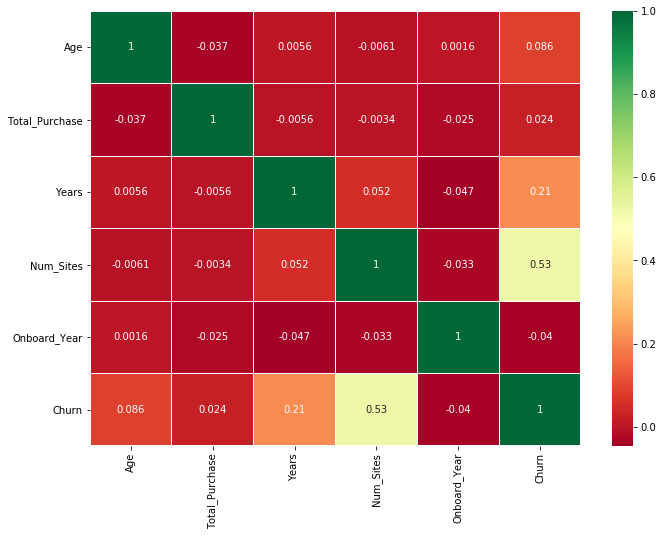

In [156]:
#Heat map of all continuous variables, ignored the categorical variables
data_continous_temp = df_train_1[['Age','Total_Purchase','Years','Num_Sites','Onboard_Year']]
data_continous_temp['Churn'] = df_train_1.Churn
sns.heatmap(data_continous_temp.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

In [171]:
#Encode the categorical variables
df_obj = df_train_1.select_dtypes(exclude=['int64','float64'])
df_num = df_train_1.select_dtypes(include=['int64','float64'])
df_encoded = df_obj.apply(LabelEncoder().fit_transform)
df_train_2 = df_num.join(df_encoded)

df_obj = df_test_1.select_dtypes(exclude=['int64','float64'])
df_num = df_test_1.select_dtypes(include=['int64','float64'])
df_encoded = df_obj.apply(LabelEncoder().fit_transform)
df_test_2 = df_num.join(df_encoded)

## 3. Model Building, Predicting and Evaluation

In [172]:
X = df_train_2.drop('Churn', axis=1)
Y = df_train_2['Churn']

In [173]:
seed = 10
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_size,random_state = seed)

In [174]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

720 720 180 180


In [175]:
model = LogisticRegression()
model.fit(X_train,Y_train) #Training the Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [192]:
train_acc = accuracy_score(Y_train, model.predict(X_train))

train_false_positive_rate, train_true_positive_rate, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:,1])
tn, fp, fn, tp= confusion_matrix(Y_train, model.predict(X_train)).ravel()

print("Training accuracy: ",train_acc)
print("Precision: ", precision_score(Y_train, model.predict(X_train)))
print("Recall: ", recall_score(Y_train, model.predict(X_train)))
print("F1 score is: ", f1_score(Y_train, model.predict(X_train), average='weighted'))
print("Train AUC is: ",auc(train_false_positive_rate, train_true_positive_rate))
print("")
print("Confusion Matrix for ", len(Y_train), "test set")
print("TN: ",tn)
print("TP: ",tp)
print("FP: ",fp)
print("FN: ",fn)

Training accuracy:  0.8902777777777777
Precision:  0.7555555555555555
Recall:  0.544
F1 score is:  0.8829143595422664
Train AUC is:  0.8991058823529412

Confusion Matrix for  720 test set
TN:  573
TP:  68
FP:  22
FN:  57


In [177]:
Y_test_pred = model.predict(X_test)

In [166]:
test_acc = accuracy_score(Y_test, Y_test_pred)

test_false_positive_rate, test_true_positive_rate, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp= confusion_matrix(Y_test, model.predict(X_test)).ravel()

print("Test accuracy: ",test_acc)
print("Precision: ", precision_score(Y_test, model.predict(X_test)))
print("Recall: ", recall_score(Y_test, model.predict(X_test)))
print("F1 score is: ", f1_score(Y_test, model.predict(X_test), average='weighted'))
print("Test AUC is: ",auc(test_false_positive_rate, test_true_positive_rate))
print("")
print("Confusion Matrix for ", len(Y_test), "test set")
print("TN: ",tn)
print("TP: ",tp)
print("FP: ",fp)
print("FN: ",fn)

Test accuracy:  0.9333333333333333
Precision:  0.8095238095238095
Recall:  0.68
F1 score is:  0.930859411058802
Test AUC is:  0.952258064516129

Confusion Matrix for  180 test set
TN:  151
TP:  17
FP:  4
FN:  8


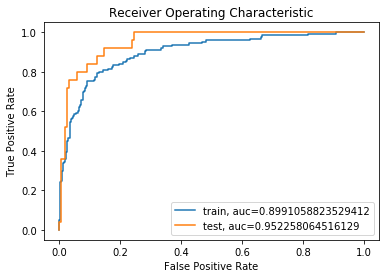

In [191]:
y_pred_proba_train = model.predict_proba(X_train)[::,1]
y_pred_proba_test = model.predict_proba(X_test)[::,1]

fpr_train, tpr_train, _ = metrics.roc_curve(Y_train,  y_pred_proba_train)
fpr_test, tpr_test, _ = metrics.roc_curve(Y_test,  y_pred_proba_test)

auc_train = metrics.roc_auc_score(Y_train, y_pred_proba_train)
auc_test = metrics.roc_auc_score(Y_test, y_pred_proba_test)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr_train,tpr_train,label="train, auc="+str(auc_train))
plt.plot(fpr_test,tpr_test,label="test, auc="+str(auc_test))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

### 10 fold cross validation

In [167]:
start_time = time.time()

scores= cross_val_score(model, X, Y, cv=10)
print("Done")
precision= cross_val_score(model, X, Y, cv=10, scoring='precision')
print("Done")
recall= cross_val_score(model, X, Y, cv=10, scoring='recall')
print("Done")
FScore= cross_val_score(model, X, Y, cv=10, scoring='f1')
print('Done')
print("Accuracy: ", scores.mean())
print("Precision", precision.mean())
print("Recall: ", recall.mean())
print("F Score: ", FScore.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Done
Done
Done
Done
Accuracy:  0.8911111111111112
Precision 0.7541522366522366
Recall:  0.52
F Score:  0.6108115301323698
--- 0.18398618698120117 seconds ---


# 4. Conclusion

#### In this problem statement, 
#### (False Negative) FN should be less i.e. Actually the customer was churned, but the model predicted as not churned; It is critical for FN to be less, because we are at risk of loosing the customer and loss to business, incase we dont assign an account manager 
#### (False Positive) FP is ok to more than FN i.e The customer is not churned but the model predicted as Churned; In this case there is no harm as we would just be unncessarily assigning an account manager

#### Hence,
#### 1) Recall should be more than Precision
#### 2) F1 Score if just 0.61 indicating, Out of all the observations labelled as positive, only 61% were actually positive.
#### But using Logistic Regression, the Precision is more then recall; Hence Logistic regression is not a good fit to this problem and we need to implement other algorithms/improve recall score for this problem.

#### Note: It was required to do feature selection, based on calculating different coorelation coefficients based on datatype of X's and Y and check multicolinearity among independent variables to reduce independent variables in model, This point is pending and requires further analysis

# 5. Prediction on the test data provided, to identify whether this unseen customer will churn

In [195]:
#Prediction on below new unseen dataset
df_test_2

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_Year,Company,State
0,37,9935.53,1,7.71,8,2011,2,3
1,23,7526.94,1,9.28,15,2013,1,5
2,65,100.00,1,1.00,15,2006,0,4
3,32,6487.50,0,9.40,14,2016,4,1
4,32,13147.71,1,10.00,8,2012,5,0
5,22,8445.26,1,3.46,14,2011,3,2


In [182]:
Y_test_pred = model.predict(df_test_2)

## In Below, output 0 indicates customer will not Churn and 1 means Customer will Churn 

In [183]:
Y_test_pred

array([0, 1, 1, 1, 0, 1], dtype=int64)

In [186]:
churned=pd.DataFrame(Y_test_pred)
Output=pd.concat([df_test_1['Company'] ,churned],axis=1)
Output.columns = ['Company', 'Churn']
Output.head(10)

,Company,Churn
0,King Ltd,0
1,Cannon-Benson,1
2,Barron-Robertson,1
3,Sexton-Golden,1
4,Wood LLC,0
5,Parks-Robbins,1


In [188]:
Output.to_csv('Output-Hackathon-HardikRaja.csv')